<a href="https://colab.research.google.com/github/trinhminhtris/Expert-system-Fuzzy-logic/blob/main/Fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=86413c08e81fa4dadbd45215fb51da8f0316748efdee26668c4046075dd33186
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


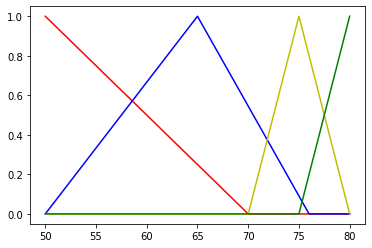

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(50, 81, 1)
slow = fuzz.trimf(x, [50, 50, 70])
plt.figure()
plt.plot(x, slow, 'r', linewidth = 1.5, label = 'slow')

medium = fuzz.trimf(x, [50, 65, 76])
plt.plot(x, medium, 'b', linewidth = 1.5, label = 'medium')

medium_fast = fuzz.trimf(x, [70, 75, 80])
plt.plot(x, medium_fast, 'y', linewidth = 1.5, label = 'medium_fast')

fast = fuzz.trimf(x, [75, 80, 80])
plt.plot(x, fast, 'g', linewidth = 1.5, label = 'fast')

# trimf: hàm tam giác

18.649717514124298


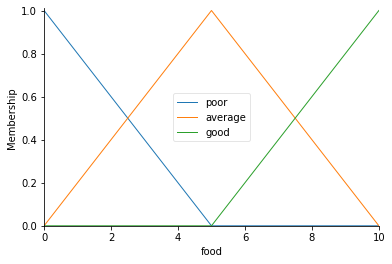

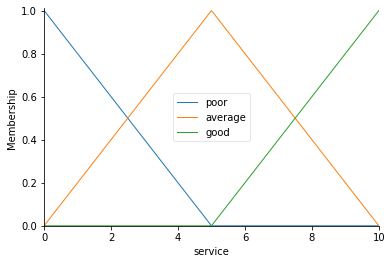

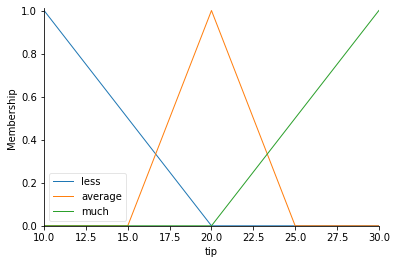

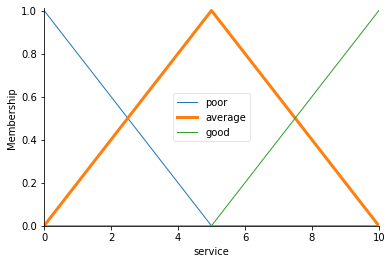

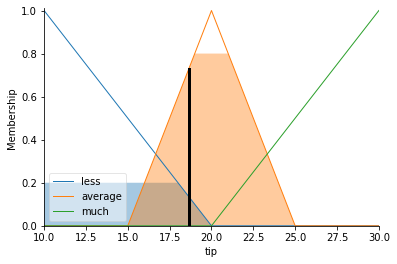

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecedent: input  Consequent: output
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(10, 31, 1), 'tip')

food['poor'] = fuzz.trimf(food.universe, [0, 0, 5])
food['average'] = fuzz.trimf(food.universe, [0, 5, 10])
food['good'] = fuzz.trimf(food.universe, [5, 10, 10])

service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])

tip['less'] = fuzz.trimf(tip.universe, [10, 10, 20])
tip['average'] = fuzz.trimf(tip.universe, [15, 20, 25])
tip['much'] = fuzz.trimf(tip.universe, [20, 30, 30])

food.view()
service.view()
tip.view()
service['average'].view()

rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['average'])
rule4 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['average'])
rule6 = ctrl.Rule(food['average'] & service['good'], tip['average'])
rule7 = ctrl.Rule(food['good'] & service['poor'], tip['average'])
rule8 = ctrl.Rule(food['good'] & service['average'], tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])

# hết phần tạo dữ liệu, bắt đầu train
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['food'] = 5
tipping.input['service'] = 4
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

49.99999999999997


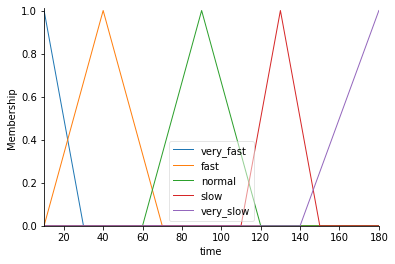

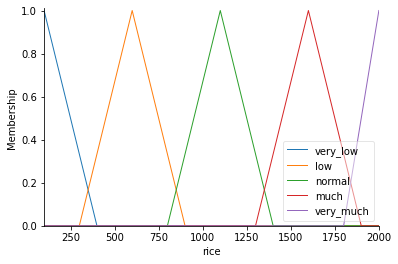

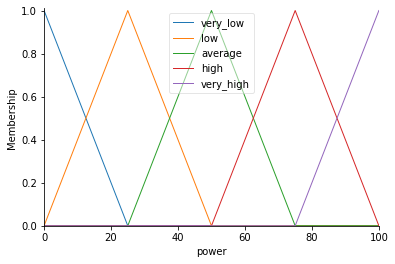

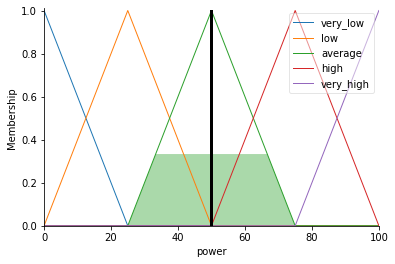

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10, 181, 1), 'time')
rice = ctrl.Antecedent(np.arange(100, 2001, 1), 'rice')
power = ctrl.Consequent(np.arange(0, 101, 1), 'power')

time['very_fast'] = fuzz.trimf(time.universe, [10, 10, 30])
time['fast'] = fuzz.trimf(time.universe, [10, 40, 70])
time['normal'] = fuzz.trimf(time.universe, [60, 90, 120])
time['slow'] = fuzz.trimf(time.universe, [110, 130, 150])
time['very_slow'] = fuzz.trimf(time.universe, [140, 180, 180])

rice['very_low'] = fuzz.trimf(rice.universe, [100, 100, 400])
rice['low'] = fuzz.trimf(rice.universe, [300, 600, 900])
rice['normal'] = fuzz.trimf(rice.universe, [800, 1100, 1400])
rice['much'] = fuzz.trimf(rice.universe, [1300, 1600, 1900])
rice['very_much'] = fuzz.trimf(rice.universe, [1800, 2000, 2000])

power['very_low'] = fuzz.trimf(power.universe, [0, 0, 25])
power['low'] = fuzz.trimf(power.universe, [0, 25, 50])
power['average'] = fuzz.trimf(power.universe, [25, 50, 75])
power['high'] = fuzz.trimf(power.universe, [50, 75, 100])
power['very_high'] = fuzz.trimf(power.universe, [75, 100, 100])

time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(time['very_slow'] & rice['very_low'], power['very_low'])
rule2 = ctrl.Rule(time['very_slow'] & rice['low'], power['very_low'])
rule3 = ctrl.Rule(time['very_slow'] & rice['normal'], power['very_low'])
rule4 = ctrl.Rule(time['very_slow'] & rice['much'], power['very_low'])
rule5 = ctrl.Rule(time['very_slow'] & rice['very_much'], power['low'])
rule6 = ctrl.Rule(time['slow'] & rice['very_low'], power['low'])
rule7 = ctrl.Rule(time['slow'] & rice['low'], power['low'])
rule8 = ctrl.Rule(time['slow'] & rice['normal'], power['low'])
rule9 = ctrl.Rule(time['slow'] & rice['much'], power['low'])
rule10 = ctrl.Rule(time['slow'] & rice['very_much'], power['average'])
rule11 = ctrl.Rule(time['normal'] & rice['very_low'], power['average'])
rule12 = ctrl.Rule(time['normal'] & rice['low'], power['average'])
rule13 = ctrl.Rule(time['normal'] & rice['normal'], power['average'])
rule14 = ctrl.Rule(time['normal'] & rice['much'], power['average'])
rule15 = ctrl.Rule(time['normal'] & rice['very_much'], power['high'])
rule16 = ctrl.Rule(time['fast'] & rice['very_low'], power['high'])
rule17 = ctrl.Rule(time['fast'] & rice['low'], power['high'])
rule18 = ctrl.Rule(time['fast'] & rice['normal'], power['high'])
rule19 = ctrl.Rule(time['fast'] & rice['much'], power['high'])
rule20 = ctrl.Rule(time['fast'] & rice['very_much'], power['very_high'])
rule21 = ctrl.Rule(time['very_fast'] & rice['very_low'], power['high'])
rule22 = ctrl.Rule(time['very_fast'] & rice['low'], power['very_high'])
rule23 = ctrl.Rule(time['very_fast'] & rice['normal'], power['very_high'])
rule24 = ctrl.Rule(time['very_fast'] & rice['much'], power['very_high'])
rule25 = ctrl.Rule(time['very_fast'] & rice['very_much'], power['very_high'])

power_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                                 rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
                                 rule20, rule21, rule22, rule23, rule24, rule25])
powerring = ctrl.ControlSystemSimulation(power_ctrl)

powerring.input['time'] = 90
powerring.input['rice'] = 800
powerring.compute()
print(powerring.output['power'])
power.view(sim = powerring)